In [1]:
import pandas as pd
gss = pd.read_hdf('./data/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


<AxesSubplot:>

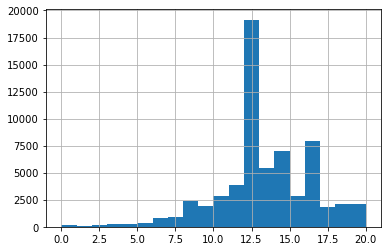

In [2]:
# plot histogram of education 
gss['educ'].hist(bins = 20)

### PMF
probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears.
the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details.
### CDF  :Cumulative distribution functions
They are also a great way to visualize and compare distributions.
If you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.
### inverse CDF:
The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. for example, if cdf is equal to 0.25 for age 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". 

### IQR: distance from the 25th to the 75th percentile is called the interquartile range, or IQR. 
It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or

In [3]:
def Pmf(seri, normalize = False, columns = ['pmf']):
    counts = seri.value_counts().sort_index()
    if normalize:
        pmf = counts/counts.sum()
    else:
        pmf = counts
    df_pmf =  pd.DataFrame(pmf)
    df_pmf.columns = columns
    return df_pmf
    

In [4]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result for last 3 years
print(pmf_year.tail())
# How many respondents were interviewed in 2016?
print(pmf_year.loc[2016])

       pmf
2008  2023
2010  2044
2012  1974
2014  2538
2016  2867
pmf    2867
Name: 2016, dtype: int64


In [5]:
import matplotlib.pyplot as plt
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)
pmf_age.head()

,pmf
18.0,350
19.0,1238
20.0,1128
21.0,1197
22.0,1261


Text(0, 0.5, 'PMF')

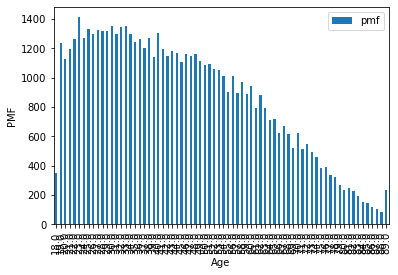

In [6]:
pmf_age.plot.bar()
# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')

In [7]:
#CDF is the cumulative sum of the PMF.
def Cdf(seri , normalize = False):
    counts = seri.value_counts().sort_index()
    if normalize:
        pmf = counts/counts.sum()
    else:
        pmf = counts
    
    cdf_value =  pmf.cumsum()
    return cdf_value
    

In [8]:
Cdf(age)[20]

2716

In [9]:
# What fraction of the respondents in the GSS dataset are OLDER than 30?
1-(Cdf(age , normalize = True)[30])

0.7460862863473612

In [10]:
# Calculate the 75th percentile of income and store it in percentile_75th
income = gss['realinc']
cdf_income  = Cdf(income, normalize = True)

In [11]:
# define an approximate equality 
def approx_Equal(x, y, tolerance=0.001):
    return abs(x-y) <= 0.5 * tolerance * (x + y)

In [12]:
# filter_75 = approx_Equal(cdf_income,.75)

In [13]:
percentile75 = cdf_income[approx_Equal(cdf_income,.75)].index

In [14]:
percentile25 = cdf_income[approx_Equal(cdf_income,.25)].index

In [15]:
iqr = percentile75-percentile25
iqr

Float64Index([29676.0], dtype='float64')

### Comparing distributions
#### Multiple PMFs
One way to compare distributions is to plot multiple PMFs on the same axes.
#### Multiple CDFs
in general, it is btter to use CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two.

Text(0, 0.5, 'Count')

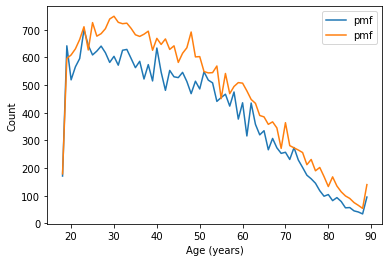

In [16]:
# Multiple PMFs
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
fig, ax = plt.subplots()
Pmf(male_age).plot(label='Male', ax = ax)
Pmf(female_age).plot(label='Female',ax = ax)
plt.xlabel('Age (years)')
plt.ylabel('Count')


### notice
there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

<AxesSubplot:>

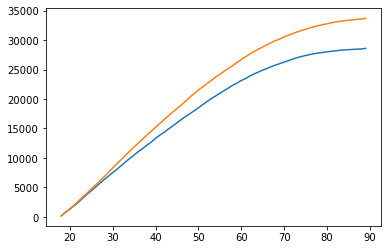

In [17]:
# Multiple CDFs
Cdf(male_age).plot(label = 'Male')
Cdf(female_age).plot(label = 'Male')

In [18]:
# What fraction of respondents report that they have 12 years of education or fewer?
edu = gss['educ']
edu_year_percent = Cdf(edu, normalize = True)
edu_year_percent[12]

0.5322611710323575

In [19]:
"""12 years of education completed high school
 14 years of education associate degree (two years of college)
 16 years has probably  bachelor's degree (four years of college)."""
# Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
# Select educ
educ = gss['educ']
# Associate degree
assc = (educ >= 14)&(educ <16)

In [20]:
# Complete the line that identifies respondents with 12 or fewer years of education.
# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


In [21]:
# Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%
# Bachelor's degree
bach = (educ >= 16)                      

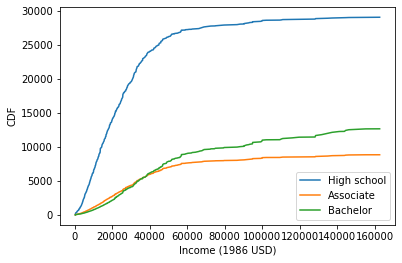

In [22]:
income = gss['realinc']
# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

### Modeling distributions
#### The normal distribution cdf and PDF plots
Normal distribution, also called the Gaussian distribution
#### KDE and PDF
 Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.
### In general, 
when  exploring the data, CDFs give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. for an audience unfamiliar with CDFs, a PMF for distributions with a small number of unique values and KDE if there are a lot of values are suitable choices

In [23]:
import numpy as np
sample = pd.Series(np.random.normal(size=1000))


In [24]:
# or 
from scipy.stats import norm
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)

In [25]:
# fig, ax = plt.subplots()
# Cdf(sample).plot(ax = ax)
# plt.plot(xs, ys, color='gray')

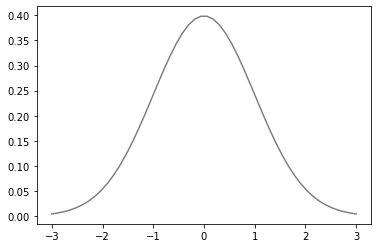

In [26]:
from scipy.stats import norm
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

<AxesSubplot:ylabel='Density'>

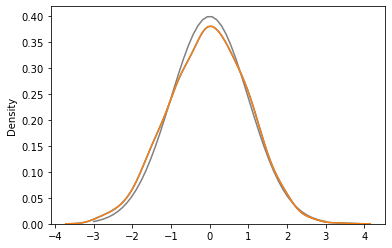

In [27]:
import seaborn as sns
sns.kdeplot(sample)
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

### Exploring relationships
#### scatter plot
- A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. 
#### Violin plot
- The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors.
#### Box plot
- Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values.
#### Log scale
- For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale().

In [28]:
brfss = pd.read_hdf('./data/brfss.hdf5','brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


Text(0, 0.5, 'Weight in kg')

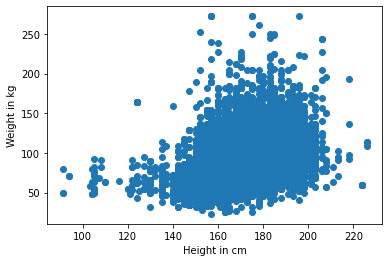

In [29]:
height = brfss['HTM4']
weight = brfss['WTKG3']
# to make the computation faster we use o rather than scatter plot
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

### improve the scatter plot
- Transparency: alpha
- Marker size, markersize
- Jittering: Adding random noise like this is called "jittering"
- Zoom:plt.axis([minx, maxx, miny, maxy])

Text(0, 0.5, 'Weight in kg')

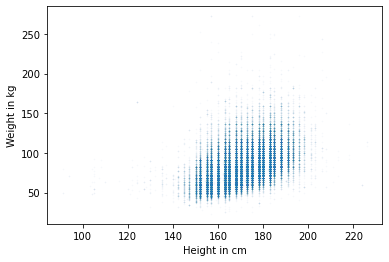

In [30]:
# add transparancy and change marker size
plt.plot(height, weight, 'o', markersize = 1, alpha = .02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

In [31]:
# as there is vertical and hozental distinct disctance, to remove the columns and rows we'll jitter the data to break up the columns and rows.
height_jitter = brfss['HTM4']+np.random.normal(0,2,size = len(brfss))
weight_jitter = brfss['WTKG3']+np.random.normal(0,2,size = len(brfss))

Text(0, 0.5, 'Weight in kg')

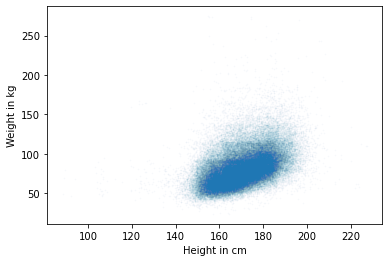

In [32]:
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = .02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

(140.0, 200.0, 0.0, 160.0)

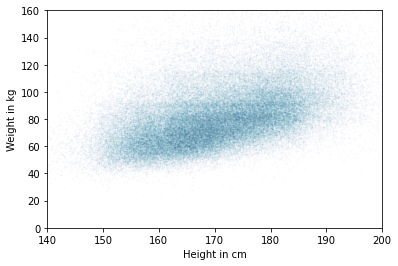

In [33]:
# zoom
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = .02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])

Text(0, 0.5, 'Weight in kg')

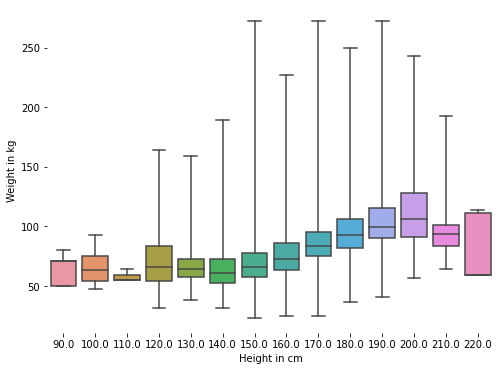

In [34]:
# boxplot
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])
plt.subplots(figsize = (8,6))
# Make a box plot
sns.boxplot(x = '_HTMG10',y = 'WTKG3', data = data, whis = 10)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

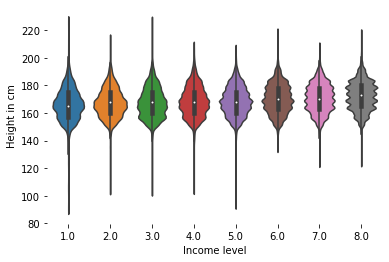

In [35]:
#use a violin plot to visualize the relationship between income and height
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot

sns.violinplot(x ='INCOME2', y = 'HTM4', data = data)
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

### note
It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. 

### Correlation
it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables

In [36]:
"""is to explore health risk factors, so it includes questions about diet.
The variable '_VEGESU1' represents the number of servings of vegetables respondents 
reported eating per day."""
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


> Which of the following are correct interpretations of these results:A&D

- A: People with higher incomes eat more vegetables.  
- B: The relationship between income and vegetable consumption is linear.  
- C: Older people eat more vegetables.  
- D: There could be a strong nonlinear relationship between age and vegetable consumption.  

### Simple regression
To estimate the slope of the line, we can use linregress() from the SciPy stats module.

In [37]:
from scipy.stats import linregress
subset = brfss.dropna(subset=['WTKG3','HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848179, intercept=-75.12704250330034, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802921, intercept_stderr=0.9608860265433051)

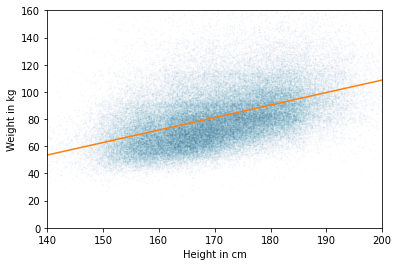

In [38]:
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = .02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'-')

In [39]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355, intercept_stderr=0.01319646754409372)


(0.0, 6.0)

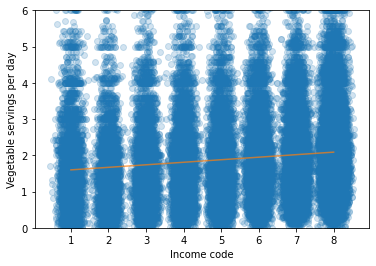

In [40]:
from scipy.stats import linregress

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])

In a previous exercise, you made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit.The slope of the line is 0.07, which means that the difference between the lowest and highest income brackets is about 0.49 servings per day. So that's not a very big difference.   
But it was an arbitrary choice to plot vegetables as a function of income. We could have plotted it the other way around. The slope of this line is 0.23, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from code 5 to code 7. If we check the codebook, income code 5 is about $30,000 per year; income code 7 is about $65,000. So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference. This example shows that regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.  
- Regression doesn't tell you much about causation. If you think people with lower income can't afford vegetables, you might look at the figure on the left and conclude that it doesn't make much difference. 

### Multiple regression
SciPy doesn't do multiple regression, so we have to switch to a new library, StatsModels. Here's the import statement. And here's how we use it. `ols` stands for "ordinary least squares", another name for regression

### regression using SciPy and StatsModels

In [41]:
#Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
from scipy.stats import linregress
import statsmodels.formula.api as smf
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355, intercept_stderr=0.01319646754409372)


In [42]:
#Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols()
# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

Intercept    1.528779
INCOME2      0.069880
dtype: float64


In [43]:
#run a regression of real income as a function of years of education
import statsmodels.formula.api as smf
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

### note
The estimated slope is 3586, which means that each additional year of education is associated with an increase of almost $3600 of income. But income also depends on age, so it would be good to include that in the model, too.

In [44]:
### Adding age
results = smf.ols('realinc ~ educ+age', data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

### note
he estimated slope for education is 3655, a little more than in the previous model. The estimated slope for age is only about $80 per year, which is surprisingly small.

Text(0, 0.5, 'Income (1986 $)')

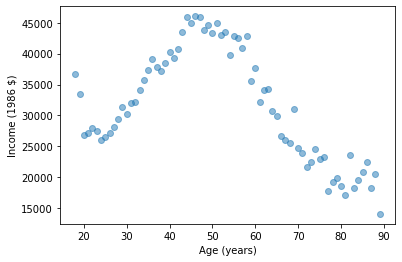

In [45]:
### looking more percisley at Income and age
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age,'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

### note
Here's the result. Average income increases from age 20 to age 50, then starts to fall. And that explains why the estimated slope is so small, because the relationship is non-linear. Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!

In [46]:
# add a new variable called age2 that equals age squared
gss['age2'] = gss['age']**2
results = smf.ols('realinc ~ educ+age+age2', data = gss).fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

### Q.
Look at the relationship between income and education


Text(0, 0.5, 'Income (1986 $)')

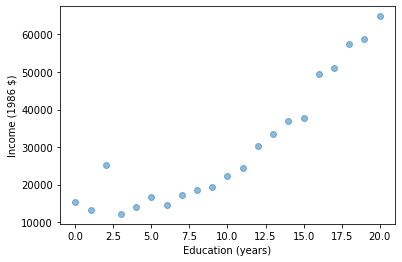

In [47]:
#Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = .5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

In [48]:
#Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

In [49]:
#Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ+educ2+age+age2', data = gss).fit()
# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


### Note 
The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.
- we called a method predict()  and then keep educ constent and predict the values
### Generating predictions


In [50]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

In [51]:
# keep the educ constant 
df['educ'] = 12
df['educ2'] = df['educ']**2

In [52]:
pred12 = results.predict(df)

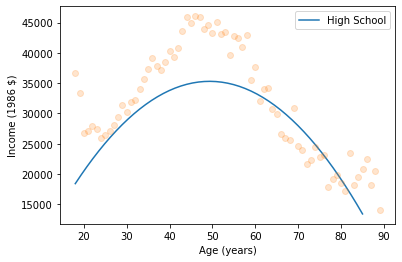

In [53]:
# Plotting predictions
plt.plot(df['age'], pred12,label = 'High School' )
plt.plot(mean_income_by_age,'o', alpha = .2 )
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

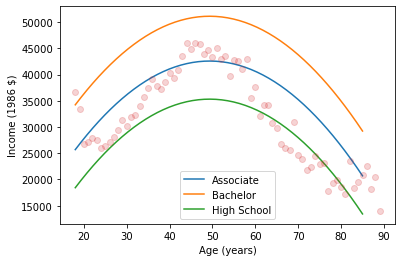

In [54]:
# lets add other education levels , Associate
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.plot(df['age'], pred12,label = 'High School' )
plt.plot(mean_income_by_age,'o', alpha = .2 )
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

### Q.what it predicts for different levels of education, holding age constant.

In [55]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


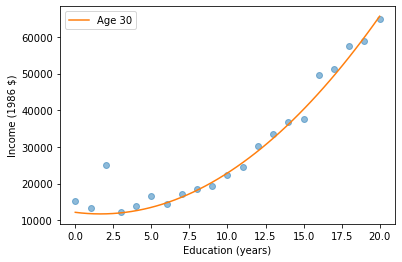

In [56]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = .5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred , label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [57]:
#!pip install empiricaldist

### Logistic regression

In [72]:
gss.head()
gss['sex'] = gss['sex'].astype('category')
gss['gunlaw'] = gss['gunlaw'].astype('float')
gss['gunlaw'].replace([2],[0], inplace = True)
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2
0,1972,26.0,1946.0,1,1,18.0,13537.0,0.0,NaN,0.8893,676.0,324.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,0.0,NaN,0.8893,3481.0,144.0


In [73]:
# lets includde a categorical variable as part of a regression model
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [75]:
# Generating predictions
df['age'] = np.linspace(18,89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

In [78]:
# make prediction for gender ==1
df['sex'] = 1
pred1 = results.predict(df)

In [79]:
# make prediction for gender == 2
df['sex'] = 2
pred2 = results.predict(df)

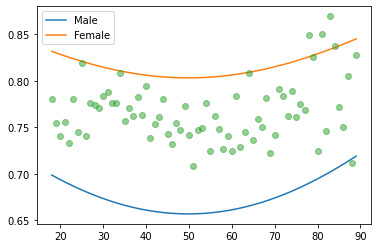

In [81]:
# want to plot for differnt age 
ages = gss.groupby(['age'])
favor_by_age = ages['gunlaw'].mean()
plt.plot(df['age'], pred1, label= 'Male')
plt.plot(df['age'], pred2, label = 'Female')
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.legend()

In [ ]:
"""# In the GSS dataset, the variable grass records the answer to the question
"Do you think the use of marijuana should be made legal or not?""""

In [83]:
gss['grass'].replace(2, 0, inplace=True)

In [94]:
groups = gss.groupby('age')
favor_age = groups['grass'].mean()

In [90]:
# lostestic regression for age + age2 + educ + educ2 + C(sex)
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [ ]:
# make prediction 
# Make a DataFrame with a range of ages
df= pd.DataFrame()
df['age'] = np.linspace(18,89)
df['age2'] = df['age']**2
# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

In [93]:
# # Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)
##
df['sex'] = 2
pred2 = results.predict(df)

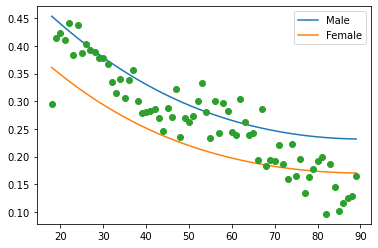

In [96]:
plt.plot(df['age'], pred1, label = 'Male')
plt.plot(df['age'], pred2, label = 'Female')
plt.plot(favor_age, 'o')
plt.legend()